# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
### With .shape we got the quantity of rows and columns in the dataframe.
df.shape

(1898, 9)

#### Observations:

The DataFrame has 9 columns and 1898 rows in total.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# The info function gives us the type of each column and quantity of non-null in each column as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The DataFrame has three different types of dataypes (object, integers, and floats)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# We use isna().sum() to get the count of missing values per column or variable
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The DataFrame has no missing values in any of the columns, so we are going to leave the database intact.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# describe() give us all the statistical data for each column
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
The minimum time for food to be prepared in all DataFrame is 20 min, the maximum time is 35 min and the average time for food to be prepared is 27 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Using value_counts() on the column 'rating' help us to get the number of occurrences for each value in the column
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
As we can see most of the orders are not rated (have as value 'Not given') with a total of 736 occurrences.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

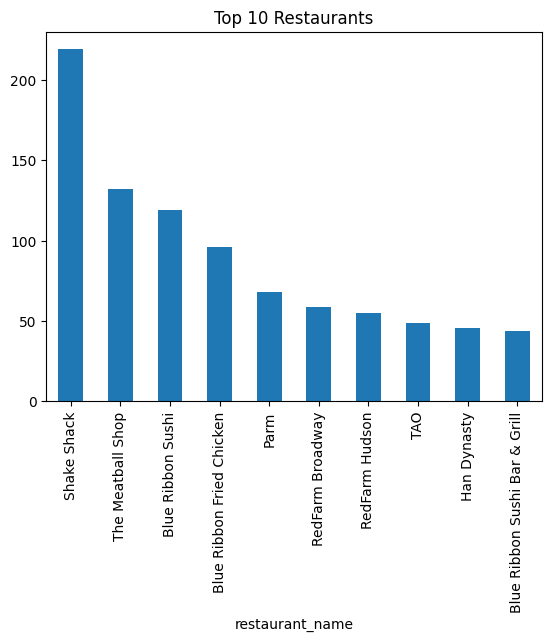

In [8]:
# We count each time a restaurant has an order, save it in variable top10 and then make a barchart with the Top 10 restaurant with more orders
top10 = df['restaurant_name'].value_counts().head(10)
top10.plot(kind='bar', title='Top 10 Restaurants');


In this chart I aim to show the most popular restaurants on FoodHub, use head(10) to show the top10 because there is many restaurants. We can see the most popular are 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi'

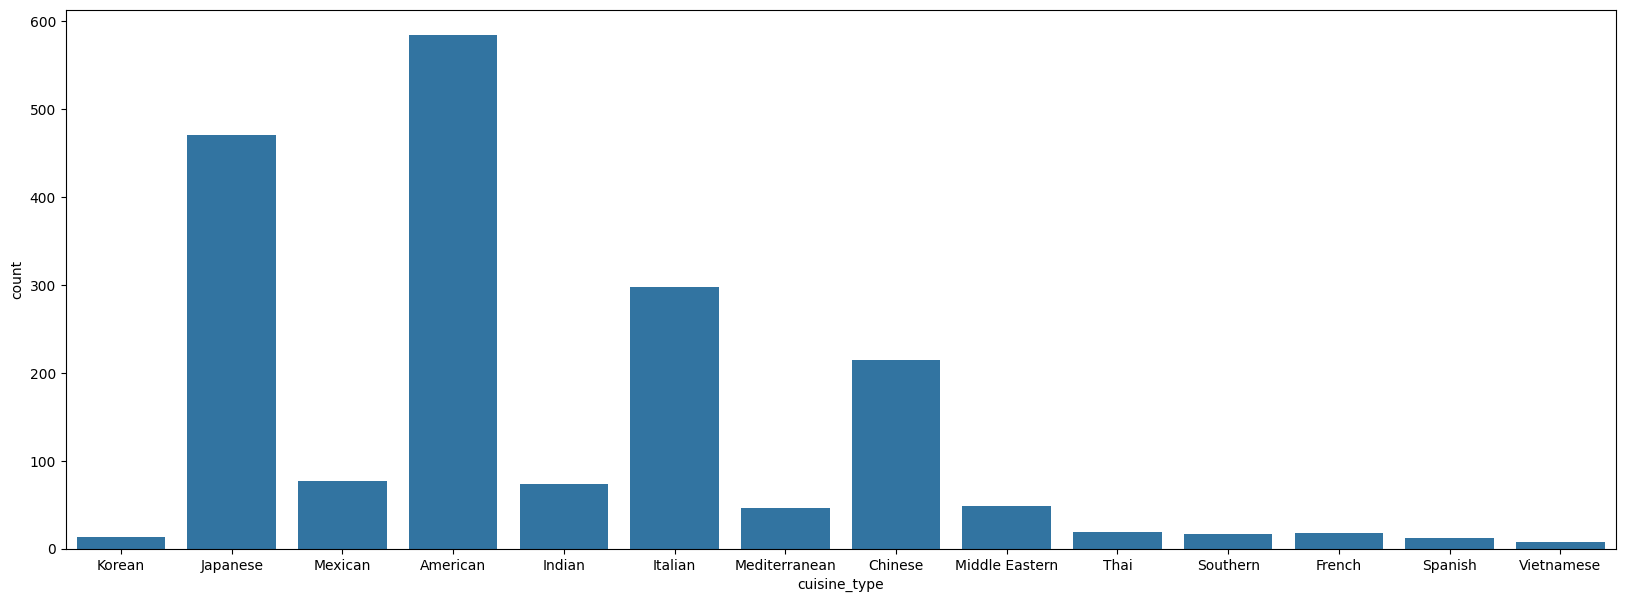

In [9]:
# First set the size of the graph and then plot the count of each cuisine_type in the DataFrame
plt.figure(figsize=(20,7))
sns.countplot(x='cuisine_type', data=df);

We can see that the most popular cuisines in the app are:

1. American
2. Japanese
3. Italian

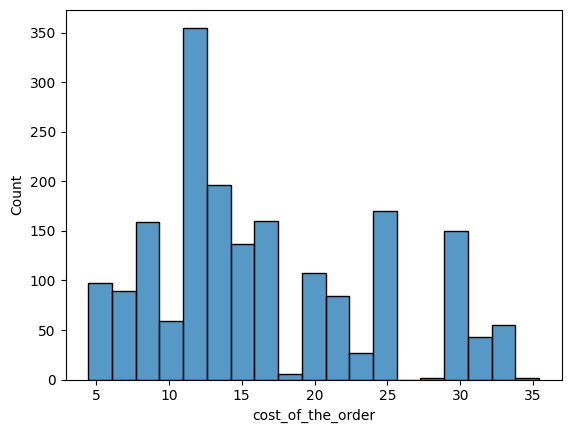

In [10]:
# This code creates a histogram to show the distribution of order costs.
sns.histplot(data=df, x='cost_of_the_order');

It helps us to see how frequently different cost orders occur. Most of them between 10 and 15 dollars.

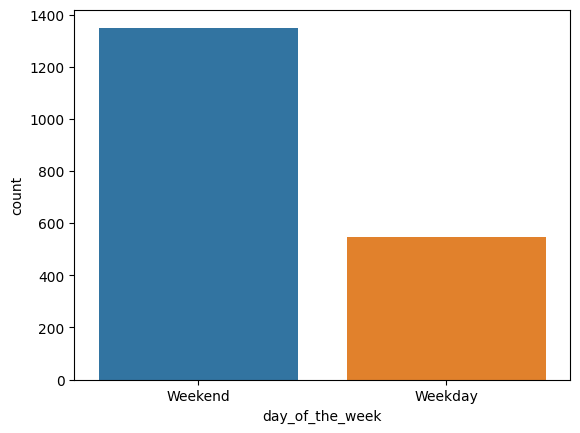

In [11]:
# Using a countplot for 'day_of_the_week' to see in which day there is more orders
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week');

As we can see on the countplot chart, that there is significantly more orders on the weekends than on weekdays

<Axes: xlabel='rating', ylabel='count'>

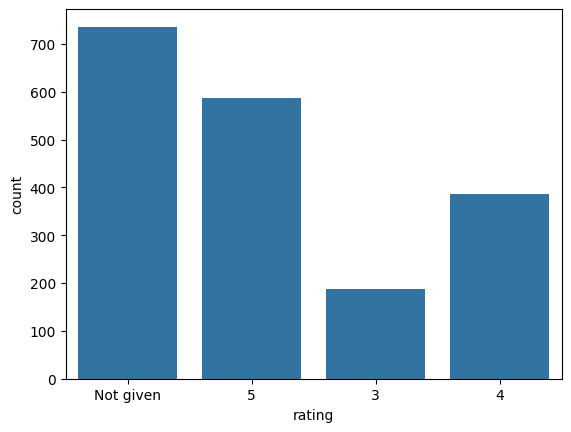

In [12]:
# This code uses a countplot for column rating
sns.countplot(data=df, x='rating')

With the countplot chart we can see the distribution of each value, there is more values in 'Not given' than in the others and there is no 1 or 2 ratings, thats good news for the business.

<Axes: xlabel='food_preparation_time'>

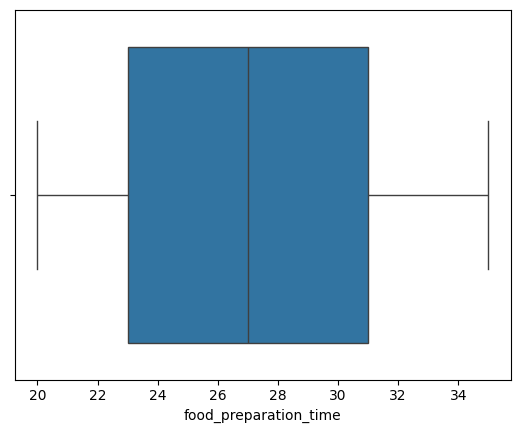

In [13]:
# Boxplot for 'food_preparation_time
sns.boxplot(data=df, x='food_preparation_time')

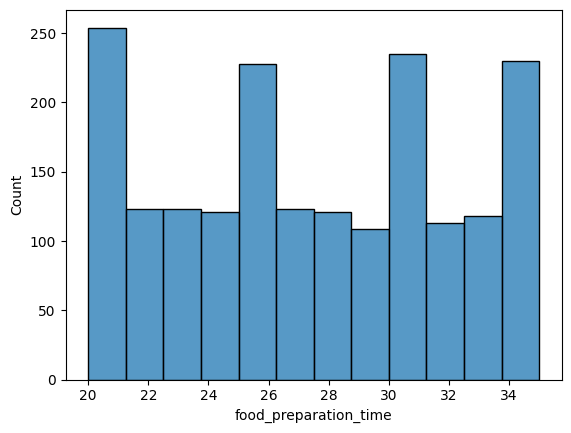

In [14]:
# Histogram plot for 'food_preparation_time'
sns.histplot(data=df, x='food_preparation_time');

The histogram of food_preparation_time shows a fairly uniform distribution, with preparation times ranging mainly between 20 and 35 minutes. The boxplot confirms this by indicating a median around 27–28 minutes, with no significant outliers. Overall, food preparation times are consistent and evenly spread across the observed range.

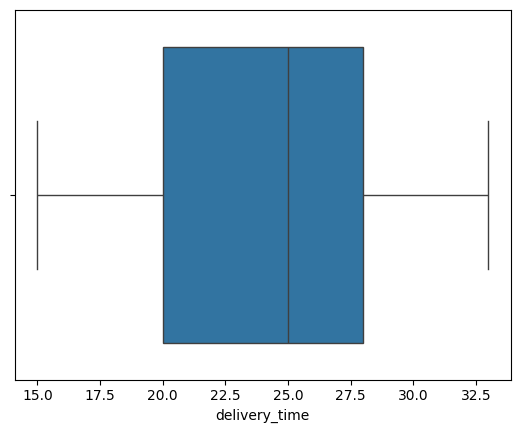

In [15]:
# Boxplot for 'delivery_time'
sns.boxplot(data=df, x='delivery_time');

The boxplot shows that the majority of delivery times range from approximately 21 to 28 minutes, with a median delivery time of 25 minutes. There are no major outliers, indicating consistent delivery times.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
# This code prints the top 5 restaurants with the highest number of orders.
# It counts how many times each restaurant appears in the 'restaurant_name' column
print(df['restaurant_name'].value_counts().head(5))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
As we saw before on the Univariate Analysis, we have the same three restaurant name, plus the 'Blue Ribbon Fried Chicken' and 'Parm'

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

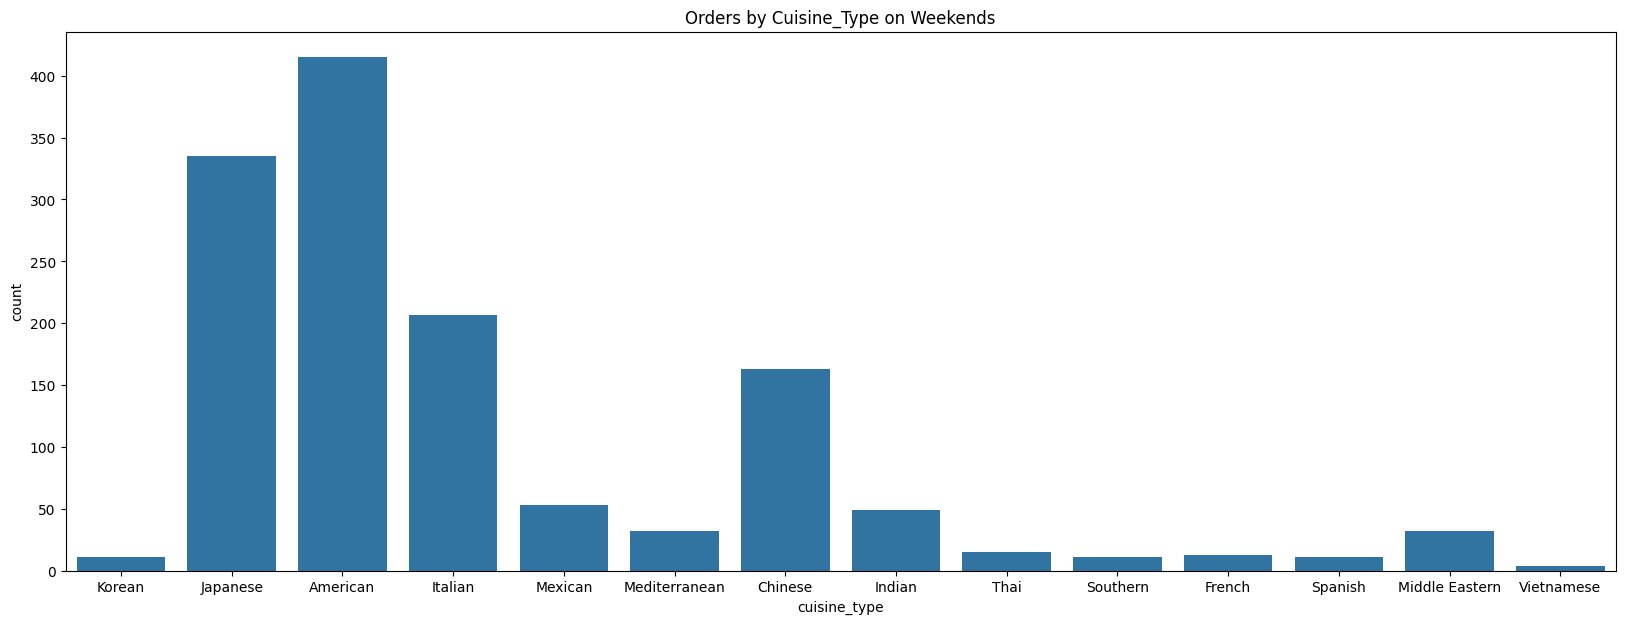

In [17]:
# Create a count plot showing the number of orders per cuisine type,
# but only for orders placed on weekends
plt.figure(figsize=(20,7))
sns.countplot(data=df[df['day_of_the_week'] == 'Weekend'], x='cuisine_type')
plt.title('Orders by Cuisine_Type on Weekends');

#### Observations:
The most popular cuisine on the weekends is 'American'

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# In this code we filter the DataFrame by 'cost_of_order' to only the ones above 20 dollars
# then we get the total of rows in this new df with shape[0] and divided by the total rows of the entire dataframe
above_20 =(df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
print(f"Percentage of orders above $20 dollars: {round(above_20,2)}%")

Percentage of orders above $20 dollars: 29.24%


#### Observations:
We can see that almost 30% of the orders cost more than 20 dollars, we saw this on the histogram of this variable where we see most of the data was below 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# We select the column of 'delivery_time' to get its mean with mean() function
mean_time = df['delivery_time'].mean()
print(f"The mean order delivery time is {round(mean_time)} minutes")

The mean order delivery time is 24 minutes


#### Observations:
As we can see the order delivery time is aprox 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# We select the 'customer_id' column and then apply value_counts function to count the times each customer_id appears
# then with the head(3) to show only the top 3 most frequent
print(df['customer_id'].value_counts().head(3))

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
As we can see the top 3 most frequent customers are customer_id: 52832 with 13 orders, 47440 with 10 orders, 83827 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


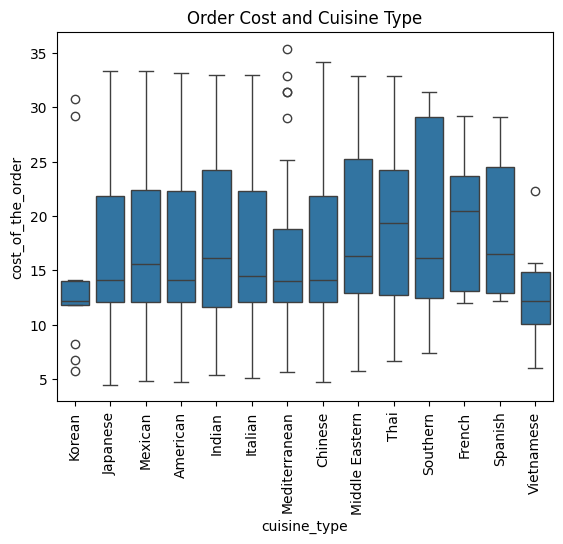

In [48]:
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title('Order Cost and Cuisine Type')
plt.xticks(rotation=90)
plt.show()

**Observations**

* French, Thai, Spanish, and Indian cuisines generally have higher median order costs compared to others.
* Korean and Vietnamese cuisines have lower median order costs, with Korean showing the least variability.
* Cuisines like Middle Eastern, Indian, and Southern show a wide interquartile range (IQR), indicating high variability in the cost of orders.
* Outliers are present across most cuisines, suggesting that some orders in these categories are significantly more expensive.


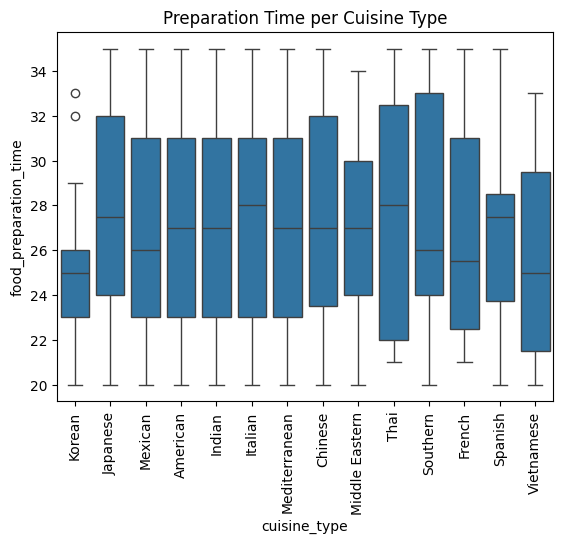

In [39]:
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=45)
plt.title('Preparation Time per Cuisine Type')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Most cuisines (e.g., American, Indian, Italian) have a median food preparation time around 27–28 minutes.
* Korean food has the shortest median preparation time and the least variability.
* Thai, Southern, and French cuisines show greater variability, this may indicate a diverse range of dishes, from quick to more time-consuming options.
* A few outliers are visible in Korean and Japanese, suggesting that occasionally, prep times for these cuisines can be longer than usual.


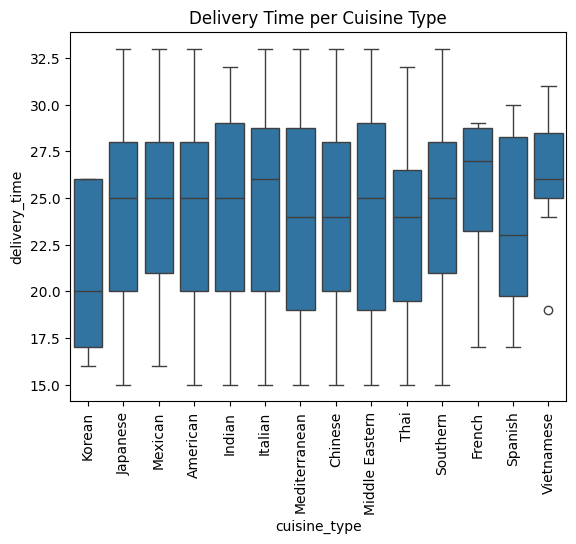

In [40]:
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.title('Delivery Time per Cuisine Type')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Again Korean cuisine shows the lowest median delivery time and the tightest range, suggesting consistently quick delivery.
* Spanish and French cuisines have higher median delivery times and broader ranges, indicating they might take longer to reach customers—possibly due to location of restaurants or delivery complexity.
* Most cuisines (like American, Middle Eastern, Chinese) have a broad interquartile range, reflecting high variability in delivery times.
* Vietnamese delivery times are not the shortest, but they are relatively consistent.



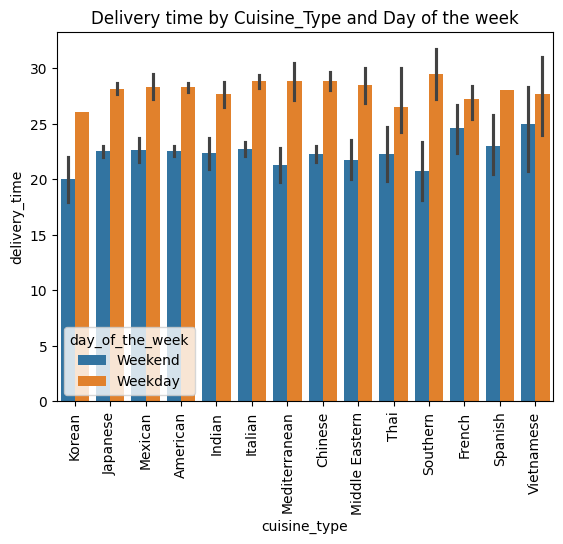

In [33]:
sns.barplot(x='cuisine_type', y='delivery_time', hue='day_of_the_week', data=df)
plt.xticks(rotation=45)
plt.title('Delivery time by Cuisine_Type and Day of the week')
plt.xticks(rotation=90)
plt.show()

**Observation**
* Across almost all cuisine types, the weekday delivery times (orange bars) are consistently higher than those on weekends. This suggests that weekday traffic, order volume, or restaurant workload could be contributing to delays.
* Regardless of the day, Korean cuisine maintains the shortest delivery times, reinforcing earlier findings from previous boxplots.
* Some cuisines like Japanese, Mexican, and Chinese show relatively stable delivery times, indicating consistent delivery operations.

The trend of longer delivery on weekdays might relate to driver availability, workday congestion, or higher order frequency, especially during lunch/dinner peaks.

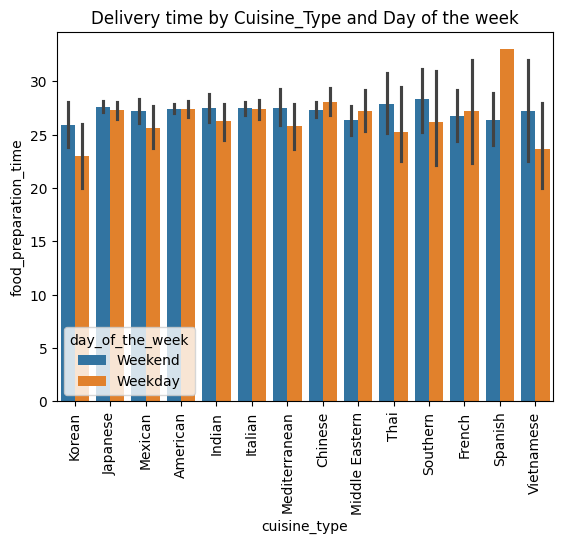

In [43]:
sns.barplot(x='cuisine_type', y='food_preparation_time', hue='day_of_the_week', data=df)
plt.xticks(rotation=45)
plt.title('Preparation Time by Cuisine_Type and Day of the week')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Unlike delivery time, food preparation times don’t vary much between weekends and weekdays. This suggests that kitchens maintain similar cooking workflows and speeds regardless of the day.
* Spanish cuisine has a noticeable increase in preparation time on weekdays, which could be due to specific dishes being more frequently ordered.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [25]:
# I created a copy with only the rows excluding 'Not given'
df_valid_ratings = df[df['rating'] != 'Not given'].copy()

# Converting rating column into integers
df_valid_ratings['rating'] = df_valid_ratings['rating'].astype(int)

# Groupby 'restaurant_name' and applying agg function to get the count and the mean
ratings_summary = df_valid_ratings.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Now we select only the restaurants with more than 50 counts and rating avg greater than 4
eligible_restaurants = ratings_summary[(ratings_summary['count'] > 50) & (ratings_summary['mean'] > 4)]
print("Restaurants eligible for promotional offer:\n")
print(eligible_restaurants)


Restaurants eligible for promotional offer:

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
As it says rating count, I do not include value 'Not given' because it is not a rating, just it doesnt have one.
The restaurants that fullfill the condition are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [26]:
# Define a function that calculates the commission based on the cost of the order
def comission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Using .apply() to apply the function to each order in the 'cost_of_the_order' column,
# then sum up all the resulting commission values to get the total revenue
total_revenue = df['cost_of_the_order'].apply(comission).sum()
print(f'Total revenue generated: ${total_revenue:.2f}')

Total revenue generated: $6166.30


#### Observations:
The total revenue generated from commission from the cost of the orders is $6,166.30 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [27]:
# We first create a new column on the df with the sum of delivery_time and preparation_time
df['total_time'] = df['delivery_time'] + df['food_preparation_time']


# Count how many orders have a 'total_time' greater than 60,
# divide by the total number of orders, and multiply by 100
above_60 = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100
print(f"Percentage of orders above 60 minutes: {round(above_60,2)} %")

Percentage of orders above 60 minutes: 10.54 %


#### Observations:
Approximately 10.54% of orders take more than 60 minutes to be delivered. This indicates that  the majority of deliveries are completed within an hour or less than an hour.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# First we groupby 'day_of_The_week, to take the avg or the mean of total count in each day of the week
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery)


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
The mean delivery time on weekdays is approximately 28.34 minutes, while on weekends it is around 22.47 minutes.
This suggests that orders are delivered faster on weekends compared to weekdays, possibly due to lighter traffic or more efficient operations during those days.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
 After understaing the data, going through univariate and multivariate analysis. I can conclude that:
-  The average delivery time is significantly higher on weekdays (28.3 minutes) compared to weekends (22.5 minutes).
- Orders with lower preparation and delivery times tend to receive higher ratings. However, 736 ratings (38.8%) are missing, limiting insights.
- Only 29.24% of orders exceed $20, which qualify for the 25% revenue share. The majority fall into the lower commission tier.
- Rewarding the most frequent cusotmers with 20% discount vouchers is a great initiative.

### Recommendations:

  Now after understanding our conclusions some recommendatios I make to the business are:
  * To avoid higher delivery times on weekdays the business could increase delivery staff during weekday peak hours or consider dynamic delivery fees or incentives for orders made during non-peak hours to redistribute demand.
  * Introduce a post-delivery rating reminder with a small incentive (e.g., discount on next order) to reduce "Not given" ratings. So we can have more ratings and make more informed decisions.
  * For the good of the revenue business, as we depende on the commissions, could be to consider implement strategies like combo meals or “add-on items” to increase average order value beyond $20 and implement limited-time promotions to encourage larger basket sizes during slower periods.

---